<a href="https://colab.research.google.com/github/femi1609/femi1609/blob/main/Transfer_Learning_using_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**TRANSFER LEARNING USING PRETRAINED MODEL**

###**OVERVIEW**

In this work, a dataset consisting of a dataset comprising 217 images was utilized of different sizes. The goal of the project was likely image classification, given the typical image dimensions and structure suitable for convolutional neural networks (CNNs). The model was trained, and features were extracted, possibly using transfer learning with a pre-trained VGG16 architecture. Key aspects of the training process included data preprocessing, model architecture configuration, and regularization techniques such as dropout layers. Features were extracted and the final model was evaluated on a separate test set.

###**Importing libraries**

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt

folder_path = '/content/drive/MyDrive/Image'
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

In [ ]:
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)

    plt.imshow(image)
    plt.title(image_file)
    plt.axis('off')
    plt.show()

###**Resizing Images to a Uniform Size and Displaying a Subset**

In [ ]:
new_size = (224, 224)
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

for filename in image_files:
    file_path = os.path.join(folder_path, filename)

    # Open the image using Pillow
    img = Image.open(file_path)

    # Resize the image
    resized_img = img.resize(new_size)
    resized_img.save(file_path)

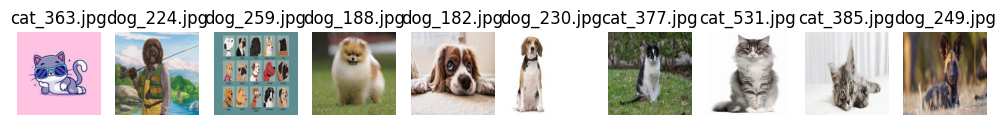

In [ ]:
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

num_images = 10

fig, axes = plt.subplots(1, num_images, figsize=(10, 10))

for i in range(num_images):
    image_file = image_files[i+50]
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)

    axes[i].imshow(image)
    axes[i].set_title(image_file)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

##**VGG 16 ARCHITECTURE**

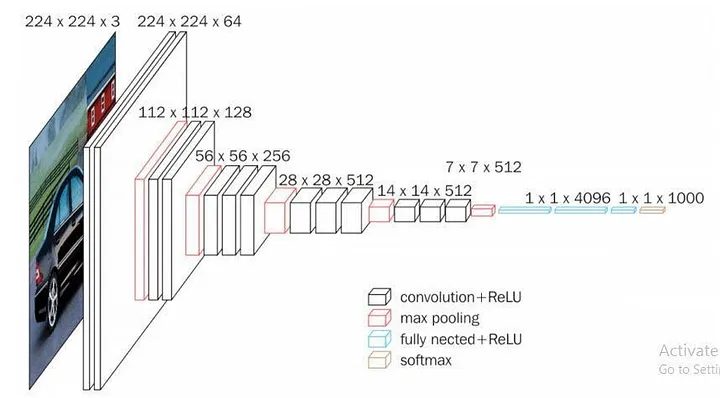

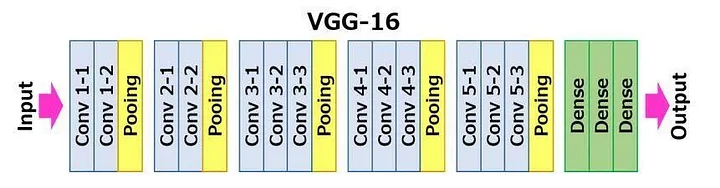

##**VGG16**

###**Introduction to VGG16:**

**Visual Geometry Group (VGG):** VGG16 is a convolutional neural network (CNN) architecture that was proposed by the Visual Geometry Group at the University of Oxford. It is well-known for its simplicity and effectiveness in image classification tasks. The architecture consists of 16 layers, including 13 convolutional layers and 3 fully connected layers.

###**Model Training:**

In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

model = models.Sequential()
flatten_layer = Flatten()(base_model.output)
predict = Dense(1, activation='sigmoid')(flatten_layer)
model = Model(inputs=base_model.input, outputs=predict)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

###**Extracting Features**

In [ ]:
feature_extraction_model = Model(inputs=base_model.input, outputs=flatten_layer)

# Load and preprocess an example image
#img_path = 'path_to_your_image.jpg'
image_path = os.path.join(folder_path, image_files[4])

img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array /= 255.0
img_array = np.expand_dims(img_array, axis=0)
img_array_normalized = preprocess_input(img_array)

# Get the features using the new model
features = feature_extraction_model.predict(img_array_normalized)

# Display the shape of the extracted features
print(f"Shape of extracted features: {features.shape}")

1/1 [==============================] - 0s 199ms/step
Shape of extracted features: (1, 25088)


In [ ]:
print(img_array_normalized)

[[[[-103.389984 -116.163315 -122.98981 ]
   [-103.389984 -116.163315 -122.98981 ]
   [-103.389984 -116.163315 -122.98981 ]
   ...
   [-103.86057  -116.67704  -123.58196 ]
   [-103.864494 -116.68096  -123.585884]
   [-103.868416 -116.68488  -123.589806]]

  [[-103.389984 -116.163315 -122.98981 ]
   [-103.389984 -116.163315 -122.98981 ]
   [-103.389984 -116.163315 -122.98981 ]
   ...
   [-103.86057  -116.67704  -123.58196 ]
   [-103.864494 -116.68096  -123.585884]
   [-103.868416 -116.68488  -123.589806]]

  [[-103.389984 -116.163315 -122.98981 ]
   [-103.389984 -116.163315 -122.98981 ]
   [-103.389984 -116.163315 -122.98981 ]
   ...
   [-103.86057  -116.67704  -123.58196 ]
   [-103.864494 -116.68096  -123.585884]
   [-103.868416 -116.68488  -123.589806]]

  ...

  [[-103.42136  -116.19469  -123.02118 ]
   [-103.42136  -116.19469  -123.02118 ]
   [-103.417435 -116.190765 -123.01726 ]
   ...
   [-103.89979  -116.73194  -123.63294 ]
   [-103.89979  -116.73194  -123.63294 ]
   [-103.89979  

In [ ]:
features = feature_extraction_model.predict(img_array)

# Display the actual feature vector
print("Feature vector:")
print(features)

1/1 [==============================] - 0s 18ms/step
Feature vector:
[[0. 0. 0. ... 0. 0. 0.]]


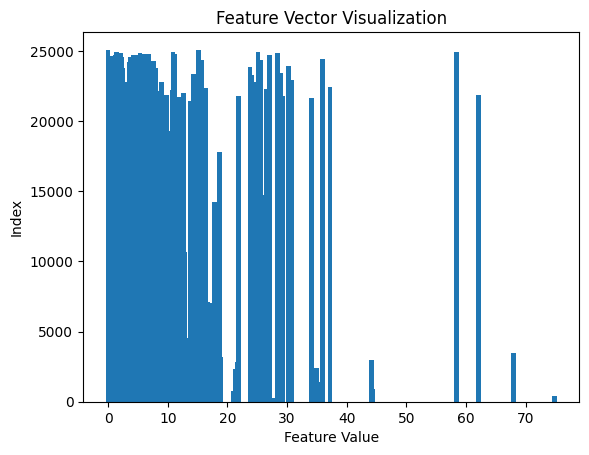

In [ ]:
indices = np.arange(len(features[0]))

# Plot the feature vector using a bar chart
plt.bar(features[0], indices)
plt.xlabel('Feature Value')
plt.ylabel('Index')
plt.title('Feature Vector Visualization')
plt.show()

###**Preparing Image Data:**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
images = []
labels = []

for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    label = 1 if 'cat' in image_path else 0

    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array /= 255.0

    images.append(img_array)
    labels.append(label)

images = np.array(images)
labels = np.array(labels)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (173, 224, 224, 3)
Train labels shape: (173,)
Test images shape: (44, 224, 224, 3)
Test labels shape: (44,)


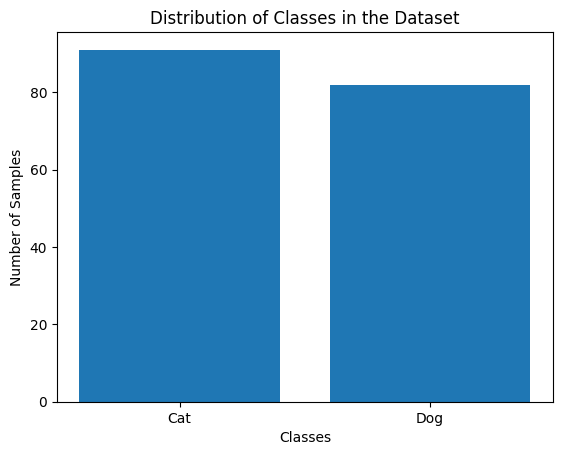

In [ ]:
import matplotlib.pyplot as plt

classes, counts = np.unique(train_labels, return_counts=True)

plt.bar(classes, counts, tick_label=["Cat", "Dog"])
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.title("Distribution of Classes in the Dataset")
plt.show()

###**Compiling:**

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.optimizers import Adam

history = model.fit(train_images, train_labels, batch_size=64,epochs=10, validation_data=(test_images, test_labels)
)

Epoch 1/10
3/3 [==============================] - 2s 488ms/step - loss: 1.1383 - accuracy: 0.4798 - val_loss: 0.6464 - val_accuracy: 0.5227
Epoch 2/10
3/3 [==============================] - 1s 311ms/step - loss: 0.6969 - accuracy: 0.5780 - val_loss: 0.5875 - val_accuracy: 0.5909
Epoch 3/10
3/3 [==============================] - 1s 365ms/step - loss: 0.4298 - accuracy: 0.7861 - val_loss: 0.8020 - val_accuracy: 0.5227
Epoch 4/10
3/3 [==============================] - 1s 287ms/step - loss: 0.3903 - accuracy: 0.7861 - val_loss: 0.4752 - val_accuracy: 0.7727
Epoch 5/10
3/3 [==============================] - 1s 292ms/step - loss: 0.2654 - accuracy: 0.9306 - val_loss: 0.4879 - val_accuracy: 0.7273
Epoch 6/10
3/3 [==============================] - 1s 288ms/step - loss: 0.2263 - accuracy: 0.9480 - val_loss: 0.4445 - val_accuracy: 0.8182
Epoch 7/10
3/3 [==============================] - 1s 359ms/step - loss: 0.1565 - accuracy: 0.9884 - val_loss: 0.5563 - val_accuracy: 0.6818
Epoch 8/10
3/3 [====

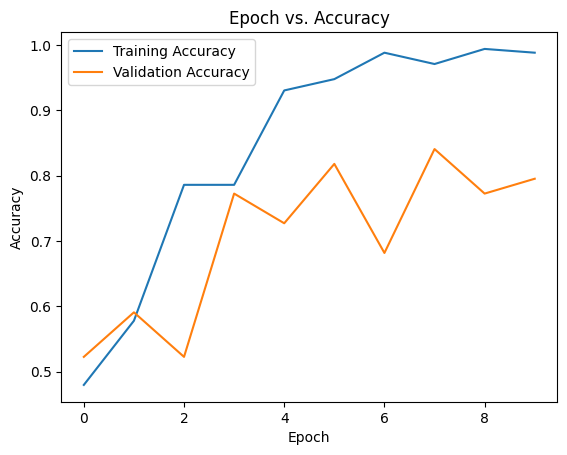

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs. Accuracy')
plt.legend()
plt.show()

###**Testing on new image**

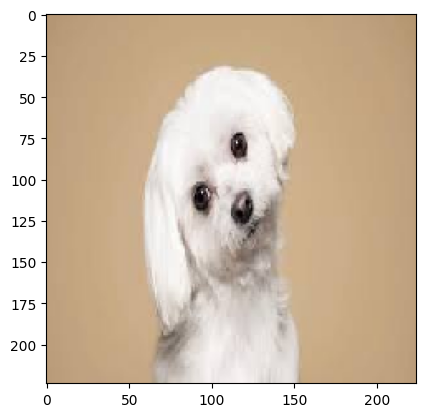

In [ ]:
img = load_img("/content/dog2.jpg",target_size = (224,224))
img_array = img_to_array(img)
plt.imshow(img)
img_array = np.expand_dims(img_array,axis=0)

In [ ]:
output = model.predict(img_array)
predicted_probability = output[0][0]

threshold = 0.5

if predicted_probability > threshold:
    print("Cat")
else:
    print("Dog")

1/1 [==============================] - 0s 19ms/step
Dog


In [ ]:
predicted_probability

2.3877347e-32

In [ ]:
output

array([[2.3877347e-32]], dtype=float32)

In [ ]:
val_loss, val_accuracy = model.evaluate(test_images, test_labels)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

2/2 [==============================] - 10s 3s/step - loss: 0.5436 - accuracy: 0.7045
Validation Loss: 0.5435726642608643, Validation Accuracy: 0.7045454382896423
